In [1]:
    # Insert NASA-ASFCatalogue Token 
import os
os.environ['EARTHDATA_TOKEN'] = #'Insert your key'

In [2]:
     # Load Modules

import odc.geo  # noqa
from odc.algo import mask_cleanup
from odc.stac import configure_rio, load
from pystac_client import Client
import datetime
import os
import rioxarray as rxr
import matplotlib.pyplot as plt
import xarray as xr
import time
import requests
from requests.exceptions import HTTPError
from tqdm import tqdm
import logging
import geopandas as gpd
import csv


In [3]:
    # Search collections

catalog = "https://cmr.earthdata.nasa.gov/cloudstac/LPCLOUD/"

# Searching across both landsat and sentinel at 30 m
collections = ["HLSS30.v2.0", "HLSL30.v2.0"]

client = Client.open(catalog)
collections

['HLSS30.v2.0', 'HLSL30.v2.0']

In [4]:
    # Add Search data [ Year, Name ROI, Dates]

# Specify MR year
year = #'year' (eg. 2024)

# Specify name of Region of Interest 

roi = #'ROI name' (eg. Project)

# Select dates

# Construct date string for datetime range
start_date = "2024-01-01"
#end_date = "YYYY-MM-DD"
end_date = datetime.date.today().strftime("%Y-%m-%d")

date_string = f"{start_date}/{end_date}"



In [5]:
# Select ROI
    # Kuamut
ll = #(northing, easting)(e.g (4.932133, 117.185748))
ur = #(norting, easting) (e.g.(5.311166, 117.632919))

bbox = [ll[1], ll[0], ur[1], ur[0]]


# Search for items in the collection
items = client.search(
    collections=collections, 
    bbox=bbox, 
    datetime=date_string).items()


In [6]:
    # Print search
    
items = [i for i in items]
print(f"Found {len(items)} items")
print(items)
for i in items:
  print(i.get_collection())

Found 46 items
[<Item id=HLS.S30.T50NNL.2024005T023109.v2.0>, <Item id=HLS.L30.T50NNL.2024009T022606.v2.0>, <Item id=HLS.S30.T50NNL.2024010T023051.v2.0>, <Item id=HLS.L30.T50NNL.2024017T022616.v2.0>, <Item id=HLS.L30.T50NNL.2024025T022601.v2.0>, <Item id=HLS.S30.T50NNL.2024025T023009.v2.0>, <Item id=HLS.S30.T50NNL.2024030T022931.v2.0>, <Item id=HLS.L30.T50NNL.2024033T022618.v2.0>, <Item id=HLS.S30.T50NNL.2024035T022909.v2.0>, <Item id=HLS.S30.T50NNL.2024040T022841.v2.0>, <Item id=HLS.L30.T50NNL.2024041T022606.v2.0>, <Item id=HLS.S30.T50NNL.2024045T022819.v2.0>, <Item id=HLS.L30.T50NNL.2024049T022611.v2.0>, <Item id=HLS.S30.T50NNL.2024050T022741.v2.0>, <Item id=HLS.S30.T50NNL.2024055T022709.v2.0>, <Item id=HLS.L30.T50NNL.2024057T022601.v2.0>, <Item id=HLS.S30.T50NNL.2024060T022631.v2.0>, <Item id=HLS.L30.T50NNL.2024065T022610.v2.0>, <Item id=HLS.S30.T50NNL.2024065T022549.v2.0>, <Item id=HLS.S30.T50NNL.2024070T022531.v2.0>, <Item id=HLS.L30.T50NNL.2024073T022550.v2.0>, <Item id=HLS.S30.T

In [8]:
    # read bands (Sentinel)
items[0].assets

{'B04': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T50NNL.2024005T023109.v2.0/HLS.S30.T50NNL.2024005T023109.v2.0.B04.tif>,
 'B8A': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T50NNL.2024005T023109.v2.0/HLS.S30.T50NNL.2024005T023109.v2.0.B8A.tif>,
 'B10': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T50NNL.2024005T023109.v2.0/HLS.S30.T50NNL.2024005T023109.v2.0.B10.tif>,
 'B02': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T50NNL.2024005T023109.v2.0/HLS.S30.T50NNL.2024005T023109.v2.0.B02.tif>,
 'B03': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T50NNL.2024005T023109.v2.0/HLS.S30.T50NNL.2024005T023109.v2.0.B03.tif>,
 'B06': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T50NNL.2024005T023109.v2.0/HLS.S30

In [9]:
    # read bands (Landsat)
items[1].assets

{'B06': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T50NNL.2024009T022606.v2.0/HLS.L30.T50NNL.2024009T022606.v2.0.B06.tif>,
 'SAA': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T50NNL.2024009T022606.v2.0/HLS.L30.T50NNL.2024009T022606.v2.0.SAA.tif>,
 'B07': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T50NNL.2024009T022606.v2.0/HLS.L30.T50NNL.2024009T022606.v2.0.B07.tif>,
 'B11': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T50NNL.2024009T022606.v2.0/HLS.L30.T50NNL.2024009T022606.v2.0.B11.tif>,
 'B05': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T50NNL.2024009T022606.v2.0/HLS.L30.T50NNL.2024009T022606.v2.0.B05.tif>,
 'B02': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T50NNL.2024009T022606.v2.0/HLS.L30

In [10]:
# Filtering bands

s30_bands = ['B12', 'B11', 'B8A', 'B04', 'B03','B02', 'B01', 'Fmask']    # S30 bands for EVI calculation and quality filtering -> SWIR2, SWIR 1, NIR, RED, GREEN, BLUE, Coastal, Quality 
l30_bands = ['B07', 'B06', 'B05', 'B04', 'B03','B02', 'B01', 'Fmask']    # L30 bands for EVI calculation and quality filtering -> SWIR2, SWIR 1, NIR, RED, GREEN, BLUE, Coastal, Quality

l30_bands #(example)

['B07', 'B06', 'B05', 'B04', 'B03', 'B02', 'B01', 'Fmask']

In [11]:
# And now to loop through and filter the items collection by bands:
new_band_links = []

for i in items:
        if i.collection_id == 'HLSS30.v2.0':
            #print(i.properties['eo:cloud_cover'])
            new_bands = s30_bands
        elif i.collection_id == 'HLSL30.v2.0':
            #print(i.properties['eo:cloud_cover'])
            new_bands = l30_bands

        for a in i.assets:
            if any(b==a for b in new_bands):
                new_band_links.append(i.assets[a].href)

In [12]:
items[1].assets

{'B06': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T50NNL.2024009T022606.v2.0/HLS.L30.T50NNL.2024009T022606.v2.0.B06.tif>,
 'SAA': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T50NNL.2024009T022606.v2.0/HLS.L30.T50NNL.2024009T022606.v2.0.SAA.tif>,
 'B07': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T50NNL.2024009T022606.v2.0/HLS.L30.T50NNL.2024009T022606.v2.0.B07.tif>,
 'B11': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T50NNL.2024009T022606.v2.0/HLS.L30.T50NNL.2024009T022606.v2.0.B11.tif>,
 'B05': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T50NNL.2024009T022606.v2.0/HLS.L30.T50NNL.2024009T022606.v2.0.B05.tif>,
 'B02': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSL30.020/HLS.L30.T50NNL.2024009T022606.v2.0/HLS.L30

In [13]:
# Rename all bands

for i in items:
    if i.collection_id == 'HLSS30.v2.0':
        # Renaming bands for HLSS30.v2.0 items
        band_mapping = {'B12': 'SWIR2', 'B11': 'SWIR 1', 'B8A': 'NIR', 'B04': 'RED', 'B03': 'GREEN', 'B02': 'BLUE', 'B01': 'Coastal', 'Fmask': 'Fmask'}
    elif i.collection_id == 'HLSL30.v2.0':
        # Renaming bands for HLSL30.v2.0 items
        band_mapping = {'B07': 'SWIR2', 'B06': 'SWIR 1', 'B05': 'NIR', 'B04': 'RED', 'B03': 'GREEN', 'B02': 'BLUE', 'B01': 'Coastal', 'Fmask': 'Fmask'}

    # Create a copy of the keys to avoid RuntimeError
    asset_keys = list(i.assets.keys())
    for a in asset_keys:
        if a in band_mapping:
            # Update the band name
            i.assets[band_mapping[a]] = i.assets.pop(a)

In [14]:
items[2].assets

{'B06': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T50NNL.2024010T023051.v2.0/HLS.S30.T50NNL.2024010T023051.v2.0.B06.tif>,
 'B09': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T50NNL.2024010T023051.v2.0/HLS.S30.T50NNL.2024010T023051.v2.0.B09.tif>,
 'B05': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T50NNL.2024010T023051.v2.0/HLS.S30.T50NNL.2024010T023051.v2.0.B05.tif>,
 'VAA': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T50NNL.2024010T023051.v2.0/HLS.S30.T50NNL.2024010T023051.v2.0.VAA.tif>,
 'B10': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T50NNL.2024010T023051.v2.0/HLS.S30.T50NNL.2024010T023051.v2.0.B10.tif>,
 'B07': <Asset href=https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T50NNL.2024010T023051.v2.0/HLS.S30

In [15]:
# Configure GDAL. You need to export your earthdata token as an environment variable.
header_string = f"Authorization: Bearer {os.environ['EARTHDATA_TOKEN']}"
configure_rio(cloud_defaults=True, GDAL_HTTP_HEADERS=header_string)

data = load(
    items,
    bbox=bbox,
    crs="epsg:32650",
    resolution=30,
    chunks={"x": 2500, "y": 2500, "time": 1},
    groupby="solar_day",
    bands=["SWIR2", "SWIR 1", "NIR", "RED", "GREEN", "BLUE", "Coastal", "Fmask"],
)

# Get cloud  mask bitfields
# I think 1 is cloud, but I can't find docs...
# And bit 2 is a mess, but might be cloud shadow... not using that
# I can't actually find the cloud shadow bit
mask_bitfields = [0, 1,  3]
bitmask = 0
for field in mask_bitfields:
    bitmask |= 1 << field

# Get cloud mask
cloud_mask = data["Fmask"].astype(int) & bitmask != 0

# Contract and then expand the cloud mask to remove small areas
dilated = mask_cleanup(cloud_mask, [("opening", 2), ("dilation", 3)])

masked = data.where(~dilated)
masked

<xarray.Dataset>
Dimensions:      (time: 42, y: 1398, x: 1654)
Coordinates:
  * y            (y) float64 5.871e+05 5.871e+05 ... 5.452e+05 5.452e+05
  * x            (x) float64 5.206e+05 5.206e+05 ... 5.701e+05 5.702e+05
    spatial_ref  int32 32650
  * time         (time) datetime64[ns] 2024-01-05T02:46:23.455000 ... 2024-06...
Data variables:
    SWIR2        (time, y, x) float32 dask.array<chunksize=(1, 1398, 1654), meta=np.ndarray>
    SWIR 1       (time, y, x) float32 dask.array<chunksize=(1, 1398, 1654), meta=np.ndarray>
    NIR          (time, y, x) float32 dask.array<chunksize=(1, 1398, 1654), meta=np.ndarray>
    RED          (time, y, x) float32 dask.array<chunksize=(1, 1398, 1654), meta=np.ndarray>
    GREEN        (time, y, x) float32 dask.array<chunksize=(1, 1398, 1654), meta=np.ndarray>
    BLUE         (time, y, x) float32 dask.array<chunksize=(1, 1398, 1654), meta=np.ndarray>
    Coastal      (time, y, x) float32 dask.array<chunksize=(1, 1398, 1654), meta=np.ndarray>
    Fmask        (time, y, x) float32 dask.array<chunksize=(1, 1398, 1654), meta=np.ndarray>

In [17]:
    # Creat a list of images and contribution to the annual composite

# Load the shapefile
shapefile_path = # " path to shapefile "
gdf = gpd.read_file(shapefile_path)

# Define a list to store the data
csv_data = []

# Iterate through each image in the loaded data
for i, (time, image) in enumerate(masked.groupby("time")):
    # Clip the image to the extent of the project area
    clipped_image = image.rio.clip(gdf.geometry)
    # Calculate the total number of pixels in the clipped image
    total_pixels = clipped_image["NIR"].size
    # Create a mask for non-NaN (non-missing) pixels
    non_nan_mask = clipped_image["NIR"].notnull()
    # Count the number of non-NaN pixels
    non_nan_pixels = non_nan_mask.sum()
    # Calculate the percentage of area covered by non-NaN pixels
    percentage_covered = (non_nan_pixels / total_pixels) * 100
    # If using Dask array, compute the percentage value
    if hasattr(percentage_covered, 'compute'):
        percentage_value = percentage_covered.compute()
    else:
        percentage_value = percentage_covered
    # Append the data to the list
    csv_data.append([f"Image {i+1}", time, f"{percentage_value:.2f}%"])

# Define the filename for the CSV file
csv_filename = f"HSL_CompositeMaskedImageryused{roi}{year}.csv"

# Write the data to the CSV file
with open(csv_filename, 'w', newline='') as csvfile:
    # Create a CSV writer object
    csv_writer = csv.writer(csvfile)
    # Write the header
    csv_writer.writerow(["Image", "Date", "Percentage of PA with imagery used"])
    # Write the data
    csv_writer.writerows(csv_data)

print(f"CSV file '{csv_filename}' has been created successfully.")


CSV file 'HSL_CompositeMaskedImageryusedKuamut2023.csv' has been created successfully.


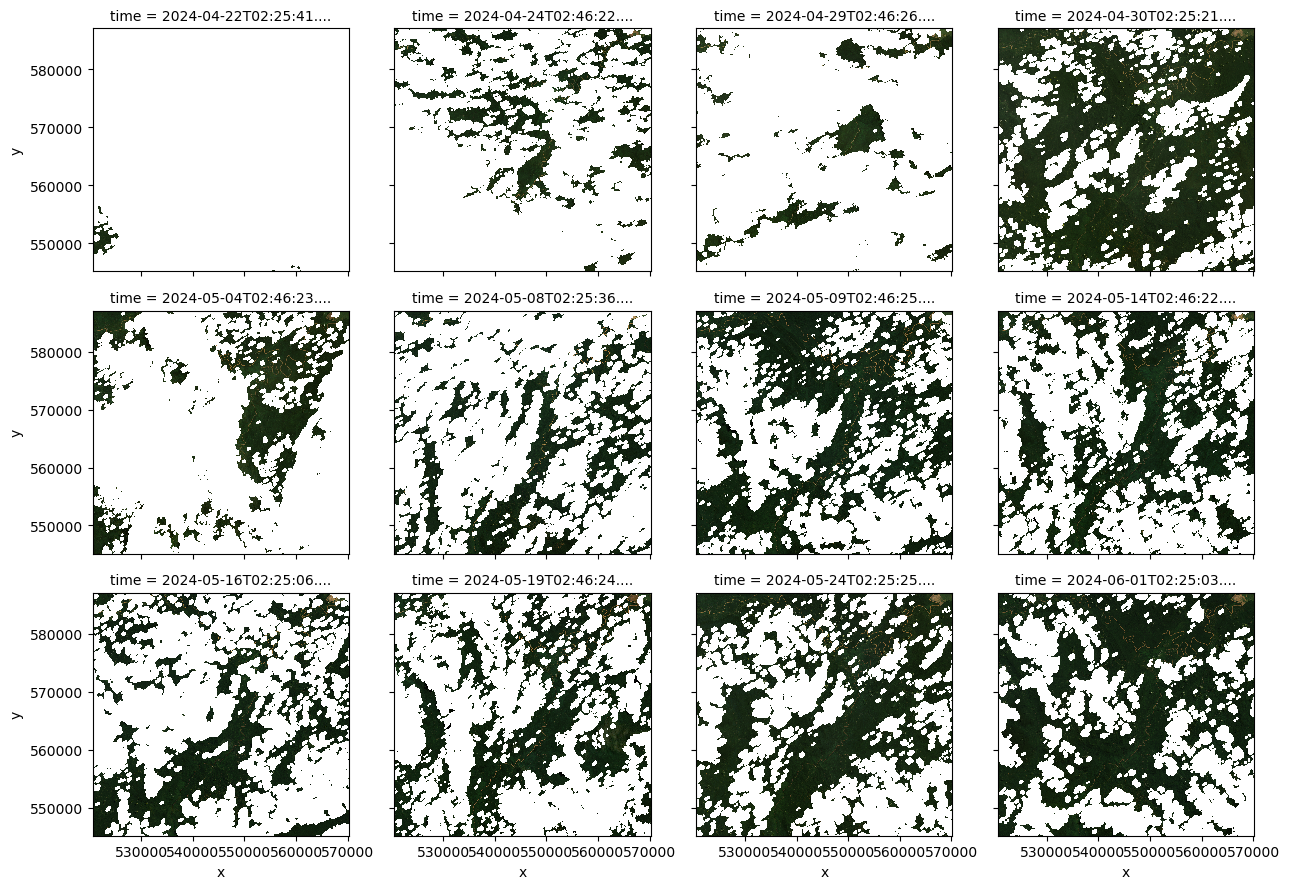

In [18]:
    # Show image test of masked images
    
masked[["RED", "GREEN", "BLUE"]].isel(time=slice(-12, None)).to_array().plot.imshow(
    col="time", col_wrap=4, vmin=0, vmax=3000
)

In [19]:
    # Create a simple cloud-free median now we have masked data

# Enable logging to track progress
logging.basicConfig(format='%(asctime)s - %(message)s', level=logging.INFO)

def retry_with_backoff(url, max_retries=5):
    """Retry a request with exponential backoff."""
    for i in range(max_retries):
        try:
            response = requests.get(url)
            response.raise_for_status()
            return response
        except HTTPError as e:
            logging.warning(f"HTTP error ({e.response.status_code}) - {url}. Retrying again in {2**i} secs")
            time.sleep(2**i)
    logging.error(f"Failed to retrieve data from {url} after {max_retries} retries")
    return None

# Create a simple cloud-free median now we have masked data
logging.info("Computing cloud-free median...")
num_steps = masked.time.size
with tqdm(total=num_steps) as pbar:
    median = []
    for step in range(num_steps):
        try:
            median.append(masked.isel(time=step))
            pbar.update(1)
        except Exception as e:
            logging.error(f"Error processing step {step}: {e}")
median = xr.concat(median, dim='time').median("time").compute()

2024-06-03 12:45:47,207 - Computing cloud-free median...
100%|██████████| 42/42 [00:00<00:00, 97.29it/s] 
C:\Users\javier.ruizramos\AppData\Local\anaconda3\lib\site-packages\xarray\core\concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
C:\Users\javier.ruizramos\AppData\Local\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


In [20]:
    # Create a simple cloud-free median now we have masked data (alternative)
#median = masked.median("time").compute()


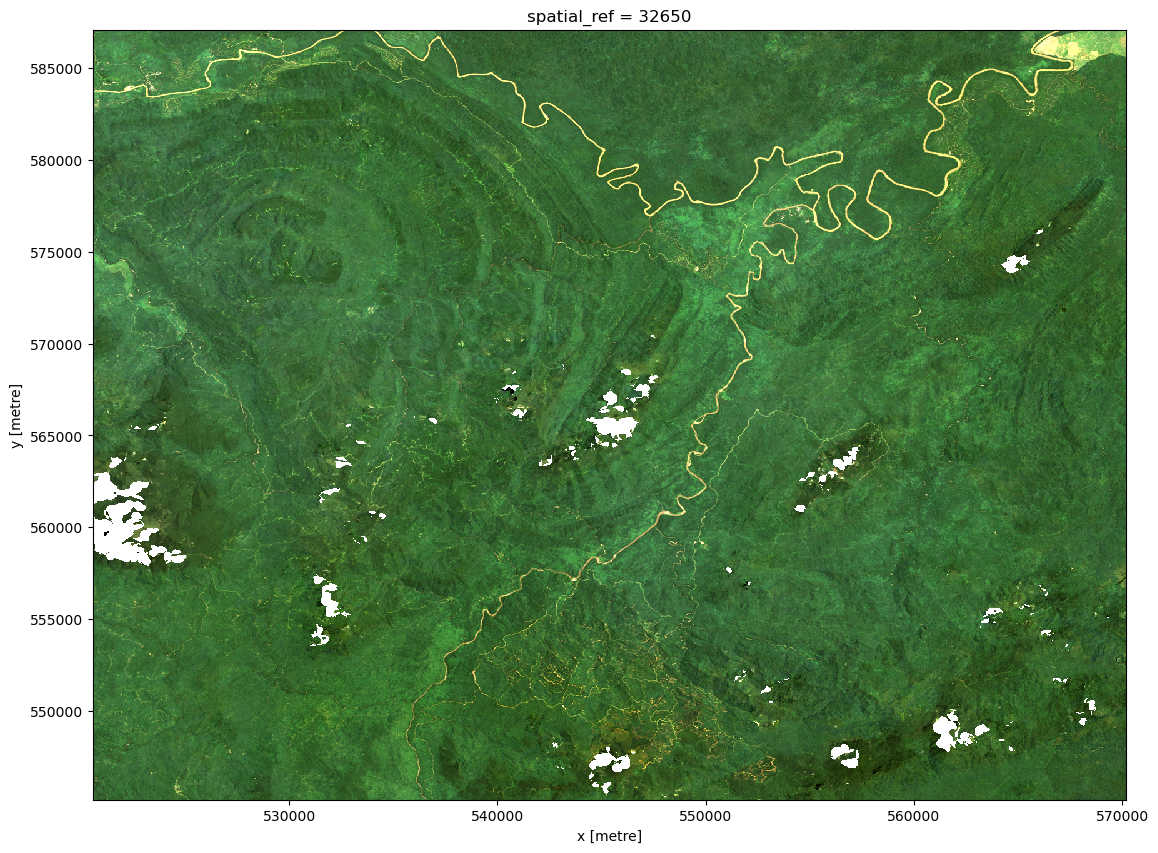

In [21]:
    # Plot the median. This is just one month, so we expect
# some areas to be missing due to clouds
rgb = median[["RED", "GREEN", "BLUE"]].to_array()
rgb.plot.imshow(size=10, vmin=0, vmax=1000)

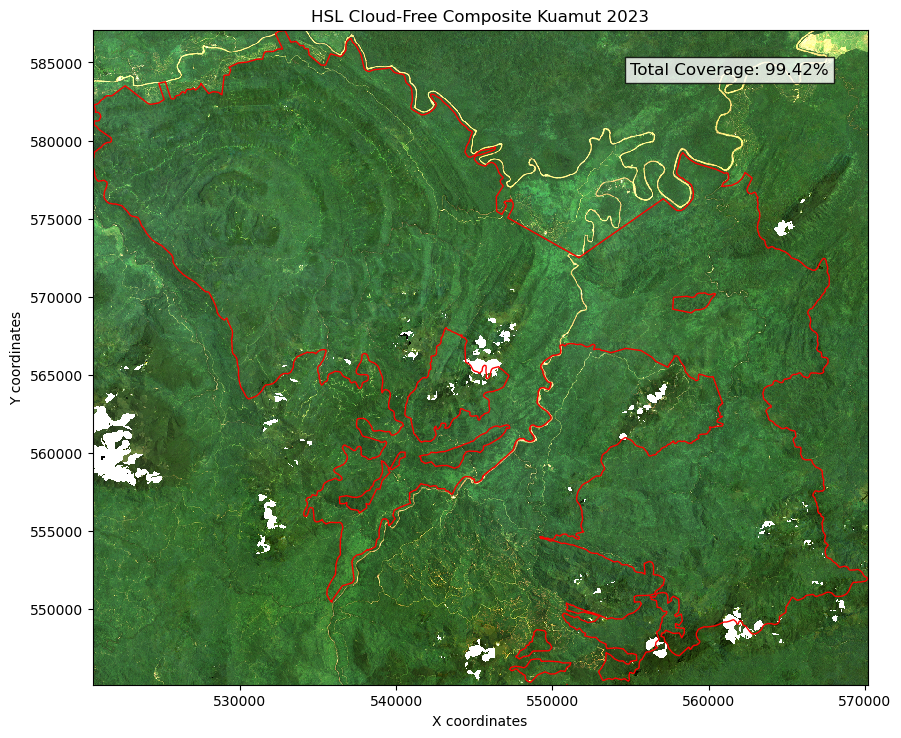

In [22]:
    # Show Image and Total ROI area covered by image composite 

roi = 'Kuamut'
# Calculate the area of the 'Kuamut project area' polygon
project_area_sqm = gdf.geometry.to_crs('EPSG:32650').area.sum()

# Calculate the area covered by the satellite image within the 'Kuamut project area'
clipped_image = median.rio.clip(gdf.geometry)
resolution = 30  # Example resolution, replace with actual resolution if known
image_area_sqm = (clipped_image["RED"].count() * resolution ** 2)

# Calculate the percentage of the area covered by the satellite image relative to the total area of the 'Kuamut project area'
percentage_covered = (image_area_sqm / project_area_sqm) * 100

# Plot the satellite image
fig, ax = plt.subplots(figsize=(10, 10))
vmin, vmax = median["RED"].min(), median["RED"].max()
rgb = median[["RED", "GREEN", "BLUE"]].to_array()
rgb.plot.imshow(ax=ax, vmin=0, vmax=1000, extent=(median.x.min(), median.x.max(), median.y.min(), median.y.max()))
gdf.plot(ax=ax, color='none', edgecolor='red')

# Annotate the plot with the calculated percentage of coverage
plt.text(0.95, 0.95, f'Total Coverage: {percentage_covered:.2f}%', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

# Set the plot title
plt.title(f'HSL Cloud-Free Composite {roi} {year}')

# Rename the axis labels
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')

# Save the plot as a high-resolution JPEG image
output_path = f"HSL_CloudFreeComposite_{roi}{year}.jpg"
plt.savefig(output_path, dpi=300)  # Set the dpi parameter to adjust the resolution

plt.show()




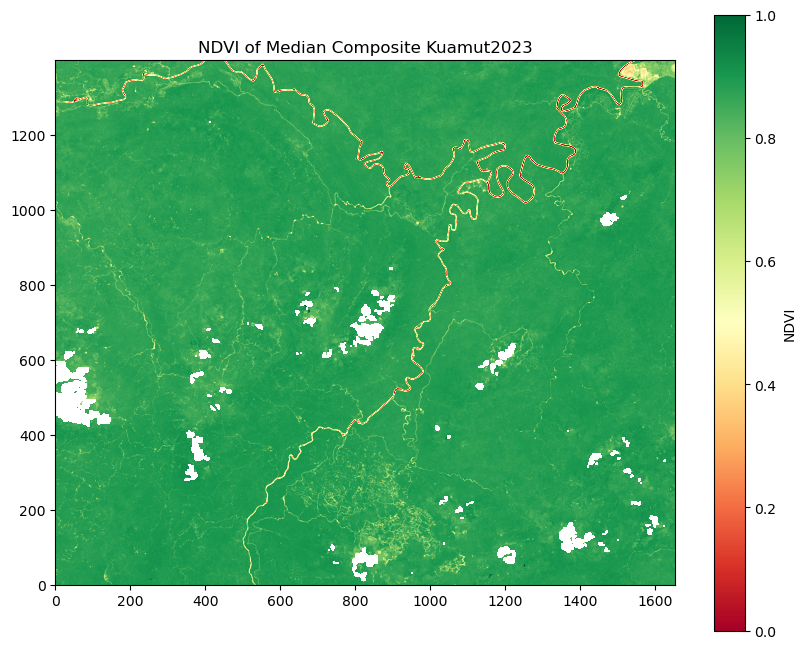

In [23]:
    # Normalised Difference Vegetation Index (NDVI)

# Select bands B05 (NIR) and B04 (Red) from the median image
nir_median = median['NIR']
red_median = median['RED']

# Calculate NDVI for the median image
ndvi_median = (nir_median - red_median) / (nir_median + red_median)

# Add NDVI as a new variable to the median image dataset
median_with_ndvi = median.assign(NDVI=ndvi_median)

# Set up a larger figure size
plt.figure(figsize=(10, 8))

# Visualize the NDVI band with scale adjusted to 0 to 1
plt.imshow(median_with_ndvi.NDVI, cmap='RdYlGn', extent=(0, median_with_ndvi.NDVI.shape[1], 0, median_with_ndvi.NDVI.shape[0]), vmin=0, vmax=1)
plt.colorbar(label='NDVI')
plt.title(f'NDVI of Median Composite {roi}{year}')
plt.show()

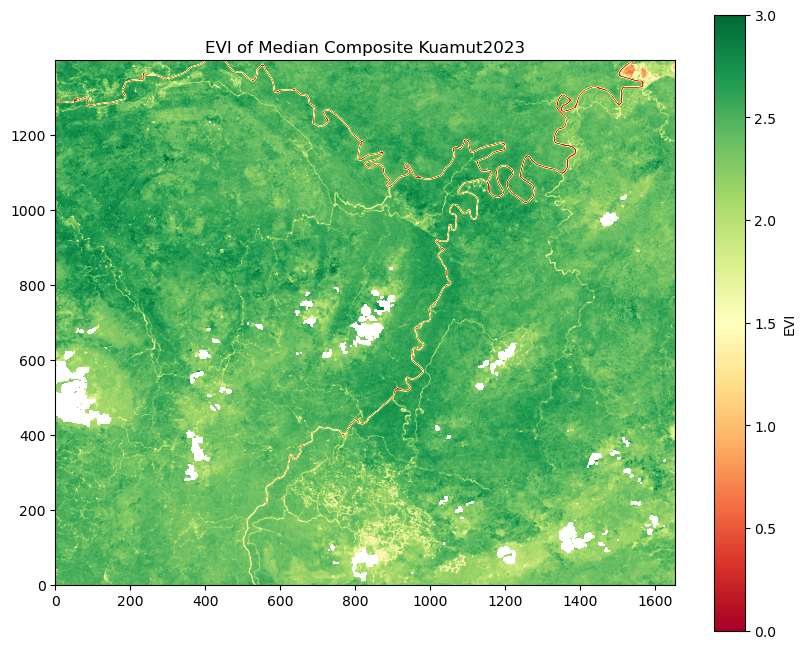

In [29]:
    # Enhanced Vegetation Index (EVI)
    
# Constants for EVI calculation
G = 2.5
C1 = 6
C2 = 7.5
L = 1

import matplotlib.pyplot as plt

# Select bands B05 (NIR) and B04 (Red) from the median image
nir = median_with_ndvi['NIR']
red = median_with_ndvi['RED']
blue = median_with_ndvi['BLUE']

    # Calculate EVI
evi_median = G * ((nir - red) / (nir + C1 * red - C2 * blue + L))

# Add NDVI as a new variable to the median image dataset
median_with_evi = median_with_ndvi.assign(EVI=evi_median)

# Set up a larger figure size
plt.figure(figsize=(10, 8))

# Visualize the NDVI band with scale adjusted to 0 to 1
plt.imshow(median_with_evi.EVI, cmap='RdYlGn', extent=(0, median_with_evi.EVI.shape[1], 0, median_with_evi.EVI.shape[0]), vmin=0, vmax=3)
plt.colorbar(label='EVI')
plt.title(f'EVI of Median Composite {roi}{year}')
plt.show()
  
 


In [25]:
    # Save Composite image with both NDVI and EVI indexes

import os
import rioxarray as rxr
# Assuming median_with_ndvi contains the raster dataset

# Get the current working directory
current_dir = os.getcwd()

# Define the file path for the COG
cog_path = os.path.join(current_dir, f"{roi}_HSL_Median{year}_V6.tif")

# Save the dataset as a Cloud Optimized GeoTIFF
median_with_evi.rio.to_raster(cog_path, driver="GTiff", tif_cog_profile="deflate")

2024-06-03 12:49:31,895 - CPLE_NotSupported in driver GTiff does not support creation option TIF_COG_PROFILE
